## NFL_Vaule
#### Brian Reppeto

###### Hypothesis

As it relates to NFL fantasy football, I would like to know if drafting a quarterback early in a fanstasy draft significantly contributes to improved fantasy football team performance compared to drafting quarterbacks later or other positions earlier.

###### Variables

The 6 variables that I will be using are:

    1. FPTS (Fantasy Points):
    2. FPTS.G (Fantasy Points Per Game):
    3. TTL_TD (Total Touchdowns):
    4. Overall (Overall Draft Position): 
    5. G (Games Played): 
    6. Posit (Position):

###### Variables Definitions

1. FPTS (Fantasy Points): This column represents the total fantasy points scored by the player over the season. Fantasy points are a key measure of a player's contribution to a fantasy team's performance.

2. Posit (Position): This indicates the player's position (e.g., QB for quarterback, RB for running back, WR for wide receiver). Different positions can have different impacts on fantasy scoring, with quarterbacks often having a significant influence.

3. TTL_TD (Total Touchdowns): Total touchdowns scored by the player, combining passing, rushing, and receiving touchdowns. Touchdowns are a major contributor to fantasy scoring, making this a crucial metric.

4. Overall (Overall Draft Position): This reflects the player's average draft position in fantasy drafts. Early draft picks are often expected to contribute more significantly to fantasy team performance.

5. G (Games Played): The number of games the player participated in during the season. Availability can impact a player's total fantasy contribution, as more games played offer more opportunities for scoring points.

6. Posit (Position):
This variable represents the position a player occupies on the field (e.g., QB for quarterback, RB for running back, WR for wide receiver). The position is a critical factor in evaluating a player's fantasy value because scoring systems often vary significantly based on positions, with quarterbacks generally scoring differently from running backs, wide receivers, and tight ends in most fantasy leagues.
     

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import gaussian_kde
import statsmodels.api as sm

In [64]:
# import Draft results

draft19_df = pd.read_csv('DSC530_final/draft_adp_2019.csv')
draft20_df = pd.read_csv('DSC530_final/draft_adp_2020.csv')
draft21_df = pd.read_csv('DSC530_final/draft_adp_2021.csv')
draft22_df = pd.read_csv('DSC530_final/draft_adp_2022.csv')


In [65]:
# append df's

drafted_df = pd.concat([draft19_df, draft20_df,draft21_df,draft22_df], ignore_index=True)

In [66]:
# head new draft df

drafted_df.head(15)

,#,Pick,Name,Pos,Team,Overall,StdDev,High,Low,TimesDrafted,Fantasy_yr,Bye
0,1,1.01,Saquon Barkley,RB,NYG,1.4,0.6,1.01,1.05,501,2019,NaN
1,2,1.03,Alvin Kamara,RB,NO,2.5,0.9,1.01,1.06,507,2019,NaN
2,3,1.03,Christian McCaffrey,RB,CAR,3.2,1.2,1.01,1.07,597,2019,NaN
3,4,1.04,Ezekiel Elliott,RB,DAL,3.9,1.2,1.01,1.08,270,2019,NaN
4,5,1.06,Davante Adams,WR,GB,6.4,1.5,1.01,2.01,332,2019,NaN
5,6,1.07,DeAndre Hopkins,WR,HOU,7.0,2.8,1.01,2.08,735,2019,NaN
6,7,1.07,James Conner,RB,PIT,7.1,1.9,1.01,1.12,335,2019,NaN
7,8,1.07,David Johnson,RB,ARI,7.1,2.0,1.03,2.04,366,2019,NaN
8,9,1.09,LeVeon Bell,RB,NYJ,8.8,2.2,1.02,2.05,514,2019,NaN
9,10,1.10,Julio Jones,WR,ATL,10.2,2.2,1.01,2.04,598,2019,NaN


In [67]:
# drop columns

drafted_df=drafted_df.drop(columns=['Bye'])
#drafted_df.drop(drafted_df.columns[1], axis=1, inplace=True)

In [68]:
# head new draft df

drafted_df.head(5)

,#,Pick,Name,Pos,Team,Overall,StdDev,High,Low,TimesDrafted,Fantasy_yr
0,1,1.01,Saquon Barkley,RB,NYG,1.4,0.6,1.01,1.05,501,2019
1,2,1.03,Alvin Kamara,RB,NO,2.5,0.9,1.01,1.06,507,2019
2,3,1.03,Christian McCaffrey,RB,CAR,3.2,1.2,1.01,1.07,597,2019
3,4,1.04,Ezekiel Elliott,RB,DAL,3.9,1.2,1.01,1.08,270,2019
4,5,1.06,Davante Adams,WR,GB,6.4,1.5,1.01,2.01,332,2019


In [69]:
# import FF stats Dataset

qb_df = pd.read_csv('DSC530_final/QB_Merged_Fantasy_Football_Statistics.csv')

In [70]:
# head new df

qb_df.head()

,Rank,Player,CMP,ATT,PCT,YDS,Y.A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS.G,ROST,Fantasy_yr,Posit
0,41,Joe Flacco (FA),110,191,57.6,"1,051",5.5,5,3,10,3,6,0,4,5,51.4,10.3,1.00%,2022,QB
1,40,Tyler Huntley (BAL),75,112,67.0,658,5.9,2,3,7,43,137,1,0,5,53.0,10.6,0.70%,2022,QB
2,39,Cooper Rush (DAL),94,162,58.0,"1,051",6.5,5,3,7,9,6,0,0,8,59.6,7.5,0.20%,2022,QB
3,38,Mike White (MIA),103,175,58.9,"1,192",6.8,3,4,9,6,9,1,1,4,60.6,15.2,1.20%,2022,QB
4,37,Mitch Trubisky (PIT),117,180,65.0,"1,252",7.0,4,5,11,19,38,2,0,7,79.0,11.3,0.60%,2022,QB


In [71]:
# extract team information and create a new 'Team' column

qb_df['Team'] = qb_df['Player'].str.extract(r'\(([^)]+)\)')

# remove team information from the 'Player' column

qb_df['Player'] = qb_df['Player'].str.replace(r'\s*\([^)]*\)\s*', '', regex=True)


In [72]:
# head new df

qb_df.head()

,Rank,Player,CMP,ATT,PCT,YDS,Y.A,TD,INT,SACKS,...,YDS.1,TD.1,FL,G,FPTS,FPTS.G,ROST,Fantasy_yr,Posit,Team
0,41,Joe Flacco,110,191,57.6,"1,051",5.5,5,3,10,...,6,0,4,5,51.4,10.3,1.00%,2022,QB,FA
1,40,Tyler Huntley,75,112,67.0,658,5.9,2,3,7,...,137,1,0,5,53.0,10.6,0.70%,2022,QB,BAL
2,39,Cooper Rush,94,162,58.0,"1,051",6.5,5,3,7,...,6,0,0,8,59.6,7.5,0.20%,2022,QB,DAL
3,38,Mike White,103,175,58.9,"1,192",6.8,3,4,9,...,9,1,1,4,60.6,15.2,1.20%,2022,QB,MIA
4,37,Mitch Trubisky,117,180,65.0,"1,252",7.0,4,5,11,...,38,2,0,7,79.0,11.3,0.60%,2022,QB,PIT


In [73]:
# drop columns

qb_df=qb_df.drop(columns=['CMP','ATT','PCT','YDS','Y.A','INT','SACKS','YDS.1','FL','ROST','ATT.1'])

In [74]:
# rename td.1 column to. rushing

qb_df=qb_df.rename(columns={'TD': 'PASSING_TD','TD.1': 'RUSHING_TD'})

In [75]:
# create column

qb_df['REC_TD']= np.nan

In [76]:
# replace NaN values with 0 in the columns

qb_df['PASSING_TD'] = qb_df['PASSING_TD'].fillna(0)
qb_df['RUSHING_TD'] = qb_df['RUSHING_TD'].fillna(0)
qb_df['REC_TD'] = qb_df['REC_TD'].fillna(0)

# convert the columns to integer type

qb_df['PASSING_TD'] = qb_df['PASSING_TD'].astype(int)
qb_df['RUSHING_TD'] = qb_df['RUSHING_TD'].astype(int)
qb_df['REC_TD'] = qb_df['REC_TD'].astype(int)

In [77]:
# summarize column

qb_df['TTL_TD'] = qb_df['PASSING_TD'] + qb_df['RUSHING_TD']+ qb_df['REC_TD']

In [78]:
# define the desired order of columns
column_order = ['Rank', 'Player','Team','Posit', 'PASSING_TD', 'RUSHING_TD', 'REC_TD', 'TTL_TD','G','FPTS','FPTS.G','Fantasy_yr']

# reorder the columns
qb_df = qb_df[column_order]


In [79]:
# head new df

qb_df.head()

,Rank,Player,Team,Posit,PASSING_TD,RUSHING_TD,REC_TD,TTL_TD,G,FPTS,FPTS.G,Fantasy_yr
0,41,Joe Flacco,FA,QB,5,0,0,5,5,51.4,10.3,2022
1,40,Tyler Huntley,BAL,QB,2,1,0,3,5,53.0,10.6,2022
2,39,Cooper Rush,DAL,QB,5,0,0,5,8,59.6,7.5,2022
3,38,Mike White,MIA,QB,3,1,0,4,4,60.6,15.2,2022
4,37,Mitch Trubisky,PIT,QB,4,2,0,6,7,79.0,11.3,2022


In [80]:
# import FF stats Dataset

rb_df = pd.read_csv('DSC530_final/RB_Merged_Fantasy_Football_Statistics.csv')

In [81]:
# head new df

rb_df.head()

,Rank,Player,ATT,YDS,Y.A,LG,X20.,TD,REC,TGT,YDS.1,Y.R,TD.1,FL,G,FPTS,FPTS.G,ROST,Fantasy_yr,Posit
0,80,Justice Hill (BAL),49,262,5.3,34,2,0,12,12,58,4.8,0,1,15,30.0,2.0,0.30%,2022,RB
1,79,DeeJay Dallas (SEA),35,186,5.3,27,1,0,17,19,126,7.4,0,0,15,30.2,2.0,0.80%,2022,RB
2,78,Marlon Mack (FA),16,84,5.3,17,0,1,8,10,99,12.4,1,0,8,30.3,3.8,6.00%,2022,RB
3,77,Ty Johnson (FA),30,160,5.3,32,3,1,12,24,88,7.3,0,0,12,30.8,2.6,0.10%,2022,RB
4,76,Jordan Mason (SF),43,258,6.0,55,4,1,0,0,0,0.0,0,0,12,31.8,2.7,0.70%,2022,RB


In [82]:
# extract team information and create a new 'Team' column

rb_df['Team'] = rb_df['Player'].str.extract(r'\(([^)]+)\)')

# remove team information from the 'Player' column

rb_df['Player'] = rb_df['Player'].str.replace(r'\s*\([^)]*\)\s*', '', regex=True)

In [83]:
# head new df

rb_df.head()

,Rank,Player,ATT,YDS,Y.A,LG,X20.,TD,REC,TGT,...,Y.R,TD.1,FL,G,FPTS,FPTS.G,ROST,Fantasy_yr,Posit,Team
0,80,Justice Hill,49,262,5.3,34,2,0,12,12,...,4.8,0,1,15,30.0,2.0,0.30%,2022,RB,BAL
1,79,DeeJay Dallas,35,186,5.3,27,1,0,17,19,...,7.4,0,0,15,30.2,2.0,0.80%,2022,RB,SEA
2,78,Marlon Mack,16,84,5.3,17,0,1,8,10,...,12.4,1,0,8,30.3,3.8,6.00%,2022,RB,FA
3,77,Ty Johnson,30,160,5.3,32,3,1,12,24,...,7.3,0,0,12,30.8,2.6,0.10%,2022,RB,FA
4,76,Jordan Mason,43,258,6.0,55,4,1,0,0,...,0.0,0,0,12,31.8,2.7,0.70%,2022,RB,SF


In [84]:
# drop columns

rb_df=rb_df.drop(columns=['X20.','ATT','REC','YDS','Y.A','YDS.1','FL','ROST','LG','TGT','Y.R'])

In [85]:
# rename td.1 column to. rushing

rb_df=rb_df.rename(columns={'TD': 'RUSHING_TD','TD.1': 'REC_TD'})

In [86]:
# create column

rb_df['PASSING_TD']= np.nan

In [87]:
# replace NaN values with 0 in the columns

rb_df['PASSING_TD'] = rb_df['PASSING_TD'].fillna(0)
rb_df['RUSHING_TD'] = rb_df['RUSHING_TD'].fillna(0)
rb_df['REC_TD'] = rb_df['REC_TD'].fillna(0)

# convert the columns to integer type

rb_df['PASSING_TD'] = rb_df['PASSING_TD'].astype(int)
rb_df['RUSHING_TD'] = rb_df['RUSHING_TD'].astype(int)
rb_df['REC_TD'] = rb_df['REC_TD'].astype(int)

In [88]:
# sumamrize column

rb_df['TTL_TD'] = rb_df['PASSING_TD'] + rb_df['RUSHING_TD']+ rb_df['REC_TD']

In [89]:
# define the desired order of columns
column_order_rb = ['Rank', 'Player','Team','Posit', 'PASSING_TD', 'RUSHING_TD', 'REC_TD', 'TTL_TD','G','FPTS','FPTS.G','Fantasy_yr']

# reorder the columns
rb_df = rb_df[column_order_rb]

In [90]:
# head new df

rb_df.head()

,Rank,Player,Team,Posit,PASSING_TD,RUSHING_TD,REC_TD,TTL_TD,G,FPTS,FPTS.G,Fantasy_yr
0,80,Justice Hill,BAL,RB,0,0,0,0,15,30.0,2.0,2022
1,79,DeeJay Dallas,SEA,RB,0,0,0,0,15,30.2,2.0,2022
2,78,Marlon Mack,FA,RB,0,1,1,2,8,30.3,3.8,2022
3,77,Ty Johnson,FA,RB,0,1,0,1,12,30.8,2.6,2022
4,76,Jordan Mason,SF,RB,0,1,0,1,12,31.8,2.7,2022


In [91]:
# import FF stats Dataset

wr_df = pd.read_csv('DSC530_final/WR_Merged_Fantasy_Football_Statistics.csv')

In [92]:
# head qb df

wr_df.head()

,Rank,Player,REC,TGT,YDS,Y.R,LG,X20.,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS.G,ROST,Fantasy_yr,Posit
0,134,Keelan Cole Sr. (LV),10,21,141,14.1,30,4,1,0,0,0,0,12,20.1,1.7,0.00%,2022,WR
1,133,Zach Pascal (ARI),15,19,150,10.0,34,3,1,1,0,0,0,15,21.0,1.4,0.10%,2022,WR
2,130,David Bell (CLE),24,35,214,8.9,20,1,0,0,0,0,0,15,21.4,1.4,0.70%,2022,WR
3,131,Skyy Moore (KC),22,33,250,11.4,30,3,0,3,24,0,3,16,21.4,1.3,60.20%,2022,WR
4,132,Sterling Shepard (NYG),13,24,154,11.8,65,4,1,0,0,0,0,3,21.4,7.1,1.00%,2022,WR


In [93]:
# extract team information and create a new 'Team' column

wr_df['Team'] = wr_df['Player'].str.extract(r'\(([^)]+)\)')

# remove team information from the 'Player' column

wr_df['Player'] = wr_df['Player'].str.replace(r'\s*\([^)]*\)\s*', '', regex=True)

In [94]:
# head qb df

wr_df.head()

,Rank,Player,REC,TGT,YDS,Y.R,LG,X20.,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS.G,ROST,Fantasy_yr,Posit,Team
0,134,Keelan Cole Sr.,10,21,141,14.1,30,4,1,0,0,0,0,12,20.1,1.7,0.00%,2022,WR,LV
1,133,Zach Pascal,15,19,150,10.0,34,3,1,1,0,0,0,15,21.0,1.4,0.10%,2022,WR,ARI
2,130,David Bell,24,35,214,8.9,20,1,0,0,0,0,0,15,21.4,1.4,0.70%,2022,WR,CLE
3,131,Skyy Moore,22,33,250,11.4,30,3,0,3,24,0,3,16,21.4,1.3,60.20%,2022,WR,KC
4,132,Sterling Shepard,13,24,154,11.8,65,4,1,0,0,0,0,3,21.4,7.1,1.00%,2022,WR,NYG


In [95]:
# drop columns

wr_df=wr_df.drop(columns=['X20.','ATT','REC','YDS','YDS.1','FL','ROST','LG','TGT','Y.R'])

In [96]:
# rename td.1 column to. rushing

wr_df=wr_df.rename(columns={'TD': 'REC_TD','TD.1': 'RUSHING_TD'})

In [97]:
# create column

wr_df['PASSING_TD']= np.nan

In [98]:
# replace NaN values with 0 in the columns

wr_df['PASSING_TD']=wr_df['PASSING_TD'].fillna(0)
wr_df['RUSHING_TD']=wr_df['RUSHING_TD'].fillna(0)
wr_df['REC_TD']=wr_df['REC_TD'].fillna(0)

# convert the columns to integer type

wr_df['PASSING_TD']=wr_df['PASSING_TD'].astype(int)
wr_df['RUSHING_TD']=wr_df['RUSHING_TD'].astype(int)
wr_df['REC_TD']=wr_df['REC_TD'].astype(int)

In [99]:
# summarize column

wr_df['TTL_TD'] = wr_df['PASSING_TD'] + wr_df['RUSHING_TD']+ wr_df['REC_TD']

In [100]:
# define the desired order of columns
column_order_wr = ['Rank', 'Player','Team','Posit', 'PASSING_TD', 'RUSHING_TD', 'REC_TD', 'TTL_TD','G','FPTS','FPTS.G','Fantasy_yr']

# reorder the columns
wr_df = wr_df[column_order_wr]

In [101]:
# head qb df

wr_df.head()

,Rank,Player,Team,Posit,PASSING_TD,RUSHING_TD,REC_TD,TTL_TD,G,FPTS,FPTS.G,Fantasy_yr
0,134,Keelan Cole Sr.,LV,WR,0,0,1,1,12,20.1,1.7,2022
1,133,Zach Pascal,ARI,WR,0,0,1,1,15,21.0,1.4,2022
2,130,David Bell,CLE,WR,0,0,0,0,15,21.4,1.4,2022
3,131,Skyy Moore,KC,WR,0,0,0,0,16,21.4,1.3,2022
4,132,Sterling Shepard,NYG,WR,0,0,1,1,3,21.4,7.1,2022


In [102]:
# import FF stats Dataset

te_df = pd.read_csv('DSC530_final/TE_Merged_Fantasy_Football_Statistics.csv')

In [103]:
# head qb df

te_df.head()

,Rank,Player,REC,TGT,YDS,Y.R,LG,X20.,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS.G,ROST,Fantasy_yr,Posit
0,80,Josiah Deguara (GB),13,15,114,8.8,25,1,0,0,0,0,0,9,11.4,1.3,0.10%,2022,TE
1,79,Pharaoh Brown (IND),12,20,117,9.8,30,2,0,0,0,0,0,9,11.7,1.3,0.00%,2022,TE
2,78,Geoff Swaim (ARI),12,16,58,4.8,13,0,1,0,0,0,0,12,11.8,1.0,0.00%,2022,TE
3,77,Jack Stoll (PHI),11,14,123,11.2,26,2,0,0,0,0,0,10,12.3,1.2,0.10%,2022,TE
4,76,Quintin Morris (BUF),8,11,84,10.5,26,1,1,0,0,0,1,9,12.4,1.4,0.10%,2022,TE


In [104]:
# extract team information and create a new 'Team' column

te_df['Team'] = te_df['Player'].str.extract(r'\(([^)]+)\)')

# remove team information from the 'Player' column

te_df['Player'] = te_df['Player'].str.replace(r'\s*\([^)]*\)\s*', '', regex=True)

In [105]:
# head qb df

te_df.head()

,Rank,Player,REC,TGT,YDS,Y.R,LG,X20.,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS.G,ROST,Fantasy_yr,Posit,Team
0,80,Josiah Deguara,13,15,114,8.8,25,1,0,0,0,0,0,9,11.4,1.3,0.10%,2022,TE,GB
1,79,Pharaoh Brown,12,20,117,9.8,30,2,0,0,0,0,0,9,11.7,1.3,0.00%,2022,TE,IND
2,78,Geoff Swaim,12,16,58,4.8,13,0,1,0,0,0,0,12,11.8,1.0,0.00%,2022,TE,ARI
3,77,Jack Stoll,11,14,123,11.2,26,2,0,0,0,0,0,10,12.3,1.2,0.10%,2022,TE,PHI
4,76,Quintin Morris,8,11,84,10.5,26,1,1,0,0,0,1,9,12.4,1.4,0.10%,2022,TE,BUF


In [106]:
# drop columns

te_df=te_df.drop(columns=['X20.','ATT','REC','YDS','YDS.1','FL','ROST','LG','TGT','Y.R'])

In [107]:
# rename td.1 column to. rushing

te_df=te_df.rename(columns={'TD': 'REC_TD','TD.1': 'RUSHING_TD'})

In [108]:
# create column

te_df['PASSING_TD']= np.nan

In [109]:
# replace NaN values with 0 in the columns

te_df['PASSING_TD']=te_df['PASSING_TD'].fillna(0)
te_df['RUSHING_TD']=te_df['RUSHING_TD'].fillna(0)
te_df['REC_TD']=te_df['REC_TD'].fillna(0)

# convert the columns to integer type

te_df['PASSING_TD']=te_df['PASSING_TD'].astype(int)
te_df['RUSHING_TD']=te_df['RUSHING_TD'].astype(int)
te_df['REC_TD']=te_df['REC_TD'].astype(int)

In [110]:
# sumamrize column

te_df['TTL_TD'] = te_df['PASSING_TD'] + te_df['RUSHING_TD']+ te_df['REC_TD']

In [111]:
# define the desired order of columns
column_order_te = ['Rank', 'Player','Team','Posit', 'PASSING_TD', 'RUSHING_TD', 'REC_TD', 'TTL_TD','G','FPTS','FPTS.G','Fantasy_yr']

# reorder the columns
te_df = te_df[column_order_te]

In [112]:
# head qb df

te_df.head()

,Rank,Player,Team,Posit,PASSING_TD,RUSHING_TD,REC_TD,TTL_TD,G,FPTS,FPTS.G,Fantasy_yr
0,80,Josiah Deguara,GB,TE,0,0,0,0,9,11.4,1.3,2022
1,79,Pharaoh Brown,IND,TE,0,0,0,0,9,11.7,1.3,2022
2,78,Geoff Swaim,ARI,TE,0,0,1,1,12,11.8,1.0,2022
3,77,Jack Stoll,PHI,TE,0,0,0,0,10,12.3,1.2,2022
4,76,Quintin Morris,BUF,TE,0,0,1,1,9,12.4,1.4,2022


In [113]:
# concat df vert

stats_df = pd.concat([qb_df, wr_df, rb_df,te_df], axis=0)

In [114]:
# head df

stats_df.head(30)

,Rank,Player,Team,Posit,PASSING_TD,RUSHING_TD,REC_TD,TTL_TD,G,FPTS,FPTS.G,Fantasy_yr
0,41,Joe Flacco,FA,QB,5,0,0,5,5,51.4,10.3,2022
1,40,Tyler Huntley,BAL,QB,2,1,0,3,5,53.0,10.6,2022
2,39,Cooper Rush,DAL,QB,5,0,0,5,8,59.6,7.5,2022
3,38,Mike White,MIA,QB,3,1,0,4,4,60.6,15.2,2022
4,37,Mitch Trubisky,PIT,QB,4,2,0,6,7,79.0,11.3,2022
5,36,Sam Darnold,SF,QB,7,2,0,9,6,89.3,14.9,2022
6,35,Deshaun Watson,CLE,QB,7,1,0,8,6,90.5,15.1,2022
7,34,Zach Wilson,NYJ,QB,6,1,0,7,9,105.0,11.7,2022
8,33,Brock Purdy,SF,QB,13,1,0,14,9,110.3,12.3,2022
9,32,Matthew Stafford,LAR,QB,10,1,0,11,9,116.5,12.9,2022


In [115]:
# sort stats_df

stats_df = stats_df.sort_values(by=['Fantasy_yr','Player','FPTS'])

# sort drafted_df

drafted_df = drafted_df.sort_values(by=['Fantasy_yr','Name'])

In [116]:
# perform a left outer join

merged_df = pd.merge(stats_df, drafted_df, how='left', left_on=['Player', 'Fantasy_yr'], right_on=['Name', 'Fantasy_yr'])

In [120]:
#merged_df.to_csv('merged_stats_data.csv', index=False)

In [123]:
# head df

merged_df.head(5)

,Rank,Player,Team_x,Posit,PASSING_TD,RUSHING_TD,REC_TD,TTL_TD,G,FPTS,...,#,Pick,Name,Pos,Team_y,Overall,StdDev,High,Low,TimesDrafted
0,10,A.J. Brown,PHI,WR,0,1,8,9,16,165.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Aaron Jones,GB,RB,0,16,3,19,16,265.8,...,30.0,3.05,Aaron Jones,RB,GB,29.2,3.4,2.01,4.04,515.0
2,10,Aaron Rodgers,NYJ,QB,26,1,0,27,16,282.0,...,58.0,5.08,Aaron Rodgers,QB,GB,55.7,7.6,1.01,6.09,249.0
3,85,Adam Humphries,FA,WR,0,0,2,2,12,49.5,...,192.0,14.11,Adam Humphries,WR,TEN,166.9,10.3,12.08,16.02,50.0
4,56,Adam Thielen,CAR,WR,0,1,6,7,10,84.4,...,23.0,2.11,Adam Thielen,WR,MIN,22.9,2.5,1.12,3.09,440.0


In [126]:
# drop NaN to clean undrafted

merged_df=merged_df.dropna(subset=['Pos', 'Overall'])

In [127]:
# head df

merged_df.head(25)

,Rank,Player,Team_x,Posit,PASSING_TD,RUSHING_TD,REC_TD,TTL_TD,G,FPTS,...,#,Pick,Name,Pos,Team_y,Overall,StdDev,High,Low,TimesDrafted
1,3,Aaron Jones,GB,RB,0,16,3,19,16,265.8,...,30.0,3.05,Aaron Jones,RB,GB,29.2,3.4,2.01,4.04,515.0
2,10,Aaron Rodgers,NYJ,QB,26,1,0,27,16,282.0,...,58.0,5.08,Aaron Rodgers,QB,GB,55.7,7.6,1.01,6.09,249.0
3,85,Adam Humphries,FA,WR,0,0,2,2,12,49.5,...,192.0,14.11,Adam Humphries,WR,TEN,166.9,10.3,12.08,16.02,50.0
4,56,Adam Thielen,CAR,WR,0,1,6,7,10,84.4,...,23.0,2.11,Adam Thielen,WR,MIN,22.9,2.5,1.12,3.09,440.0
5,28,Adrian Peterson,FA,RB,0,5,0,5,16,130.0,...,140.0,12.01,Adrian Peterson,RB,WAS,133.1,12.1,8.08,14.12,218.0
8,55,Alexander Mattison,MIN,RB,0,1,0,1,13,58.4,...,134.0,11.07,Alexander Mattison,RB,MIN,127.3,12.1,5.03,13.05,273.0
12,59,Alshon Jeffery,FA,WR,0,1,4,5,10,79.2,...,74.0,6.12,Alshon Jeffery,WR,PHI,71.9,6.9,4.12,8.10,392.0
13,16,Alvin Kamara,NO,RB,0,5,1,6,14,167.5,...,2.0,1.03,Alvin Kamara,RB,NO,2.5,0.9,1.01,1.06,507.0
14,7,Amari Cooper,CLE,WR,0,0,8,8,16,167.5,...,35.0,3.09,Amari Cooper,WR,DAL,33.1,4.3,2.03,4.08,555.0
19,63,Anthony Miller,FA,WR,0,0,2,2,16,75.5,...,142.0,12.02,Anthony Miller,WR,CHI,134.4,7.5,10.01,13.05,139.0


In [128]:
#merged_df.to_csv('merged_stats_data.csv', index=False)

###### Histograms


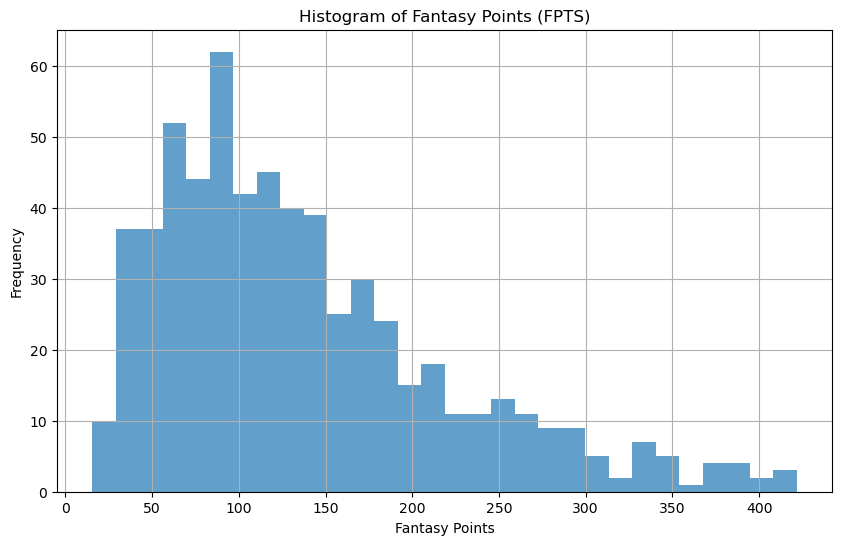

In [130]:
# histogram for FPTS (Fantasy Points)

plt.figure(figsize=(10, 6))
plt.hist(merged_df['FPTS'], bins=30, alpha=0.7)
plt.title('Histogram of Fantasy Points (FPTS)')
plt.xlabel('Fantasy Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

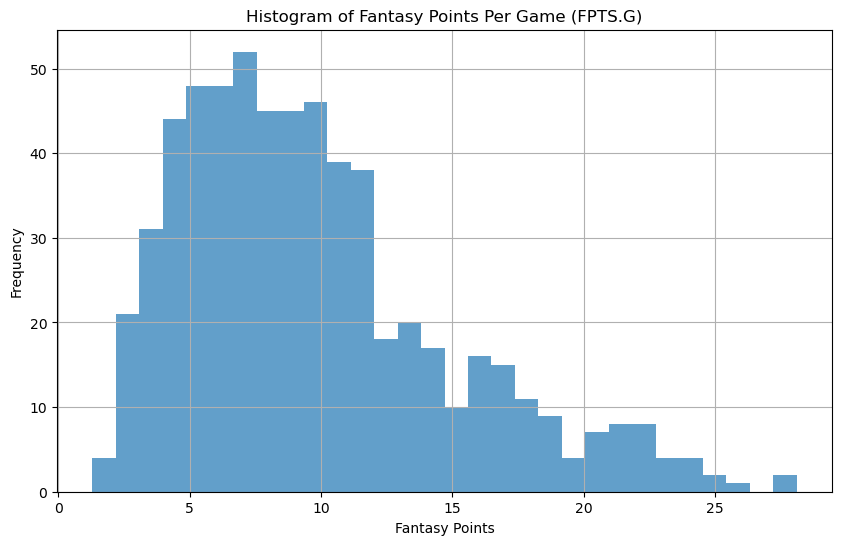

In [140]:
# histogram for FPTS.G (Fantasy Points Per Game)

plt.figure(figsize=(10, 6))
plt.hist(merged_df['FPTS.G'], bins=30, alpha=0.7)
plt.title('Histogram of Fantasy Points Per Game (FPTS.G)')
plt.xlabel('Fantasy Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

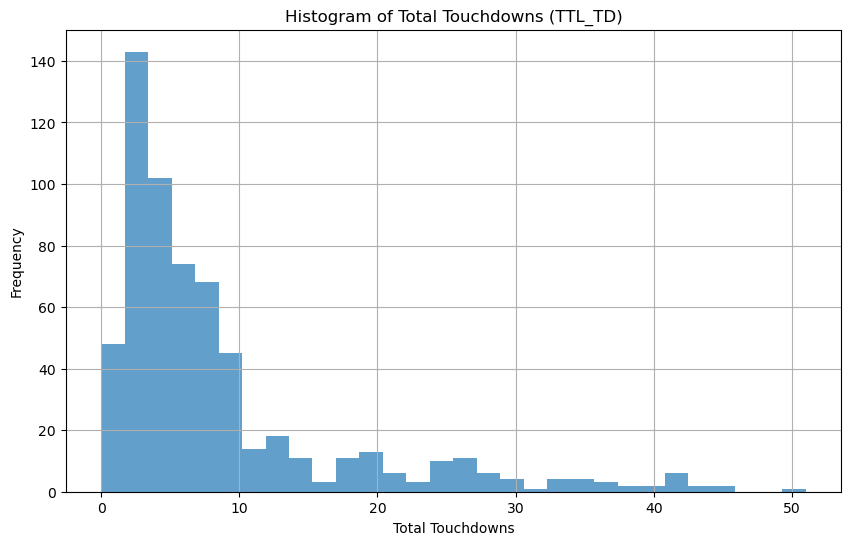

In [133]:
# histogram for TTL_TD (Total Touchdowns)

plt.figure(figsize=(10, 6))
plt.hist(merged_df['TTL_TD'], bins=30, alpha=0.7)
plt.title('Histogram of Total Touchdowns (TTL_TD)')
plt.xlabel('Total Touchdowns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



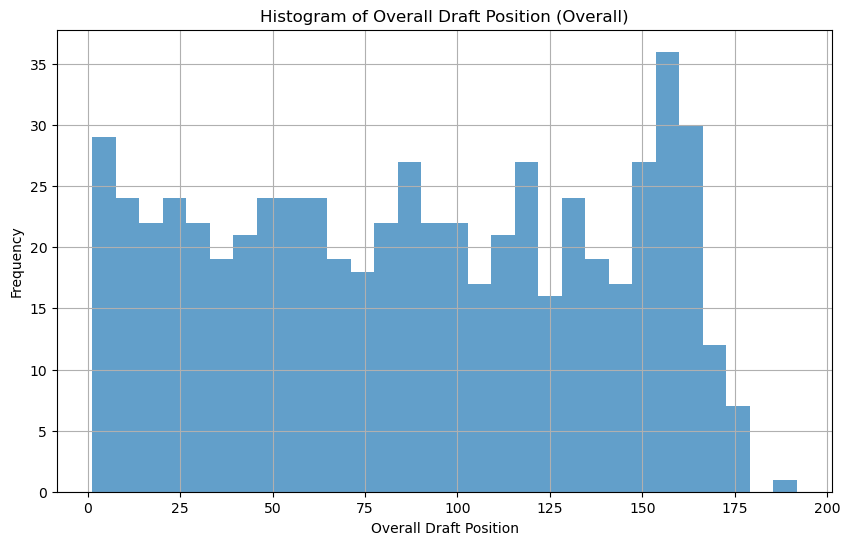

In [135]:
# histogram for "Overall" (Overall Draft Position)

plt.figure(figsize=(10, 6))
plt.hist(merged_df['Overall'], bins=30, alpha=0.7)
plt.title('Histogram of Overall Draft Position (Overall)')
plt.xlabel('Overall Draft Position')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


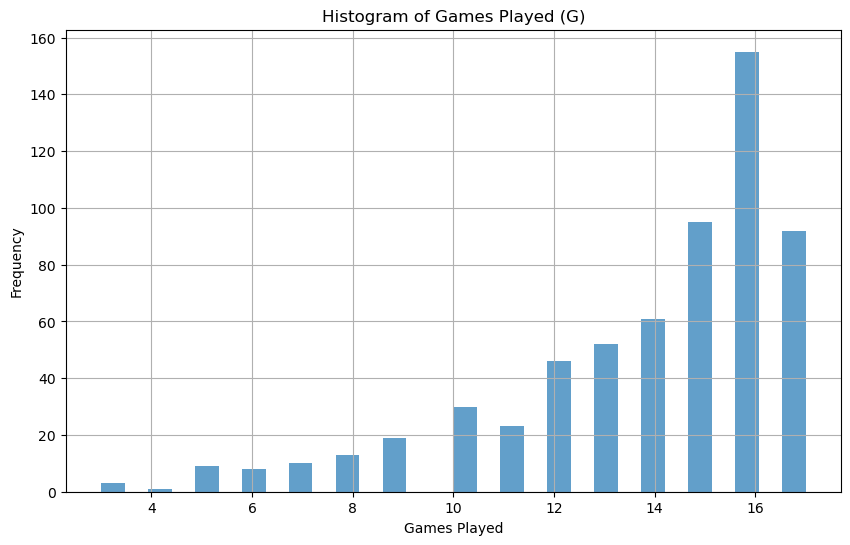

In [132]:
# histogram for G (Games Played)

plt.figure(figsize=(10, 6))
plt.hist(merged_df['G'], bins=30, alpha=0.7)
plt.title('Histogram of Games Played (G)')
plt.xlabel('Games Played')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


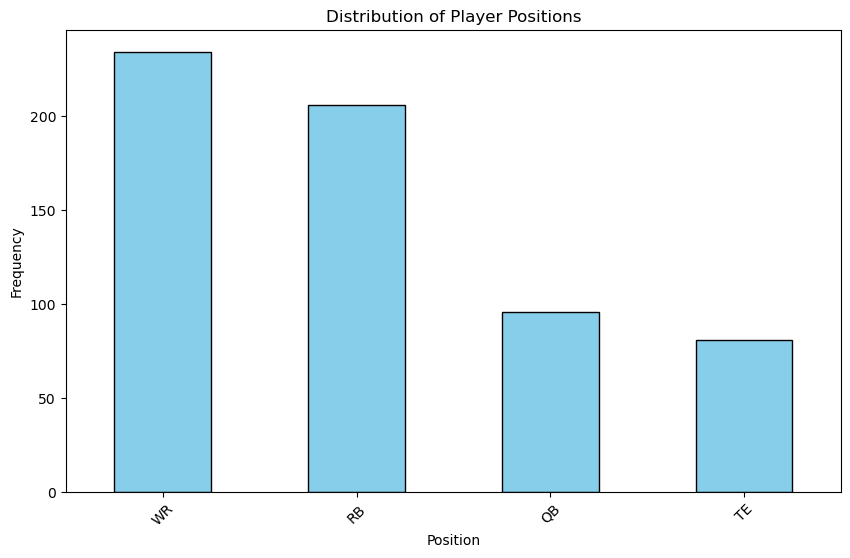

In [153]:
# plot the distribution of player positions


# examine the distribution of player positions
position_counts = merged_df['Posit'].value_counts()

# plot the distribution of player positions
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

###### Outliers


1.  Fantasy Points (FPTS):
The histogram for Fantasy Points (FPTS) shows a right-skewed distribution, indicating that most players score lower fantasy points, with a few outliers scoring significantly higher. This skewness is typical in fantasy sports, where a small number of players tend to outperform others by a large margin. These outliers represent top performers and should not be removed as they are critical for fantasy football analysis, especially when assessing the impact of drafting decisions.

2. Total Touchdowns (TTL_TD):
The histogram for Total Touchdowns (TTL_TD) also exhibits a right-skewed distribution. Most players have a lower number of touchdowns, with a decrease in frequency as the number of touchdowns increases. There are fewer players with a high number of touchdowns, which is consistent with the nature of the game where scoring opportunities can vary significantly among players. The outliers in this distribution represent exceptional performers, and similar to FPTS, they are crucial for understanding the dynamics of player performance and should be retained for analysis.

3. Overall Draft Position (Overall) :
The histogram for the Overall Draft Position (Overall) displays a somewhat uniform distribution across the range of draft positions, with slight variations. This suggests that players are spread relatively evenly across different draft positions. The presence of a mode at the lower end (indicating a higher frequency of players with lower draft numbers) could reflect the structure of the dataset or the drafting strategy, where certain positions or high-performing players are drafted earlier. The distribution does not indicate significant outliers in terms of draft positions, as all values fall within a plausible range for a fantasy draft.

4. Fantasy Points (FPTS):
The histogram of Fantasy Points Per Game (FPTS.G) is sumular to FPTS, and also is right-skewed, suggesting that while most players have lower fantasy points per game, a few exceptional players score significantly higher on a per-game basis.

5.  Games Played (G):
The histogram for Games Played (G) illustrates a left-skewed distribution, corroborating the skewness value of -1.26. This distribution indicates that a large number of players participate in many games, with the frequency tapering off for lower game counts. The mode at 16 games suggests that a significant portion of players are involved in the majority of the season's games, with fewer players participating in a reduced number of games due to reasons like injuries or being less frequently selected for play.

6. Posit (Position):
The distribution of player positions indicates a variety of roles, with the following key insights:

Wide Receivers (WR) are the most common, with 234 instances.
Running Backs (RB) follow closely, with 206 instances.
Quarterbacks (QB) are less common, with 96 instances.
Tight Ends (TE) are the least common, with 81 instances.

The distribution reflects typical fantasy football rosters, where WRs and RBs are often the most numerous due to their roles in both the running and passing games, providing multiple opportunities to score fantasy points. QBs, while fewer in number, are pivotal players because of their potential for high scoring through passing yards and touchdowns. TEs, though the least common, can be crucial in fantasy leagues, especially those that award points for receptions (PPR leagues), due to their roles in both the passing and blocking games.

###### Calculate descriptive statistics (Mean, Mode, Spread, and analysis of Tails)

In [141]:
# calc the descriptive char (Mean, Mode, Spread, and Tails) for the 5 variables:
# variables: 'Overall' (ADP), 'FPTS', 'G', 'TTL_TD', 'FPTS.G'

# prep data for mode calculation
mode_adp = merged_df['Overall'].mode().tolist()
mode_fpts = merged_df['FPTS'].mode().tolist()
mode_g = merged_df['G'].mode().tolist()
mode_ttl_td = merged_df['TTL_TD'].mode().tolist()
mode_fpts_g = merged_df['FPTS.G'].mode().tolist()

# calc descr stats

descriptive_stats = pd.DataFrame({
    'Variable': ['Overall (ADP)', 'FPTS', 'G', 'TTL_TD', 'FPTS.G'],
    'Mean': [
        merged_df['Overall'].mean(),
        merged_df['FPTS'].mean(),
        merged_df['G'].mean(),
        merged_df['TTL_TD'].mean(),
        merged_df['FPTS.G'].mean()
    ],
    'Mode': [mode_adp, mode_fpts, mode_g, mode_ttl_td, mode_fpts_g],
    'Spread (StdDev)': [
        merged_df['Overall'].std(),
        merged_df['FPTS'].std(),
        merged_df['G'].std(),
        merged_df['TTL_TD'].std(),
        merged_df['FPTS.G'].std()
    ],
    'Tails (Skewness)': [
        merged_df['Overall'].skew(),
        merged_df['FPTS'].skew(),
        merged_df['G'].skew(),
        merged_df['TTL_TD'].skew(),
        merged_df['FPTS.G'].skew()
    ]
})

descriptive_stats



,Variable,Mean,Mode,Spread (StdDev),Tails (Skewness)
0,Overall (ADP),87.947488,"[1.2, 28.5, 42.4, 72.2, 152.3, 163.9]",51.410783,-0.005989
1,FPTS,136.789465,"[41.4, 47.7, 72.6, 73.9, 114.3]",83.114983,1.098594
2,G,13.865478,[16],3.012914,-1.259256
3,TTL_TD,8.612642,[6],9.057753,2.082407
4,FPTS.G,9.736791,[10.5],5.134546,0.975509


###### Compare two scenarios in your data using a PMF

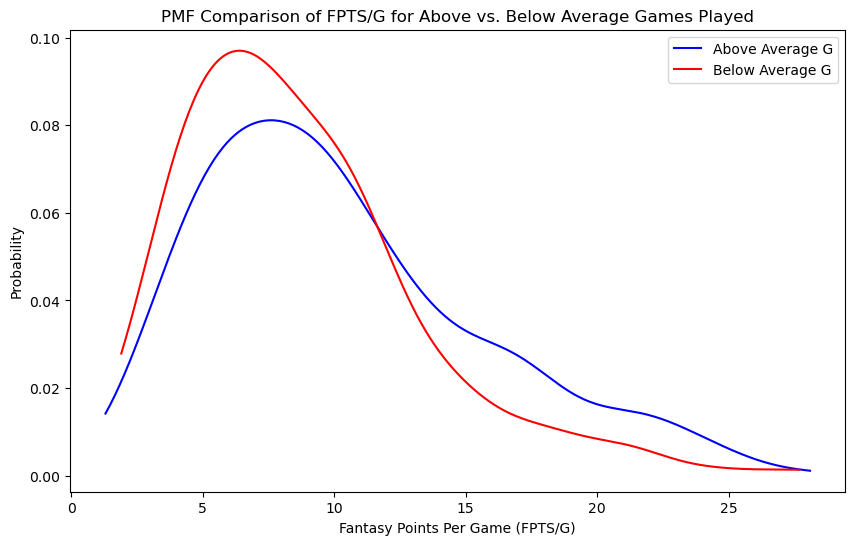

In [159]:
# create two scenarios based on Overall Draft Position: Early (Overall <= 30) vs Late (Overall > 30)

# calc the avg number of games played
average_games_played = merged_df['G'].mean()

# split the dataset into two groups: Above Average Games Played and Below Average Games Played
above_avg_games = merged_df[merged_df['G'] > average_games_played]['FPTS.G'].dropna()
below_avg_games = merged_df[merged_df['G'] <= average_games_played]['FPTS.G'].dropna()

# calc the PMF for each group
above_avg_games_pmf = above_avg_games.value_counts(normalize=True)
below_avg_games_pmf = below_avg_games.value_counts(normalize=True)

# generate a smooth density estimation for each PMF
x_above_avg = np.linspace(above_avg_games.min(), above_avg_games.max(), 300)
density_above_avg = gaussian_kde(above_avg_games)(x_above_avg)

x_below_avg = np.linspace(below_avg_games.min(), below_avg_games.max(), 300)
density_below_avg = gaussian_kde(below_avg_games)(x_below_avg)

# plot the PMF
plt.figure(figsize=(10, 6))
plt.plot(x_above_avg, density_above_avg, label='Above Average G', color='blue')
plt.plot(x_below_avg, density_below_avg, label='Below Average G', color='red')
plt.title('PMF Comparison of FPTS/G for Above vs. Below Average Games Played')
plt.xlabel('Fantasy Points Per Game (FPTS/G)')
plt.ylabel('Probability')
plt.legend()
plt.show()



Players with Above Average Games Played show a distribution that suggests a steadier or potentially higher performance on a per-game basis. This could indicate that players who are available more often, possibly due to fewer injuries or consistent selection, tend to maintain or exceed their performance levels across more games.

The distribution for players with Below Average Games Played is also noteworthy but might display a bit more variability. This variability could suggest that players who participate in fewer games (due to injuries, rotations, or other factors) have a wider range of performance outcomes when they do play.

###### Create 1 CDF with one of your variables

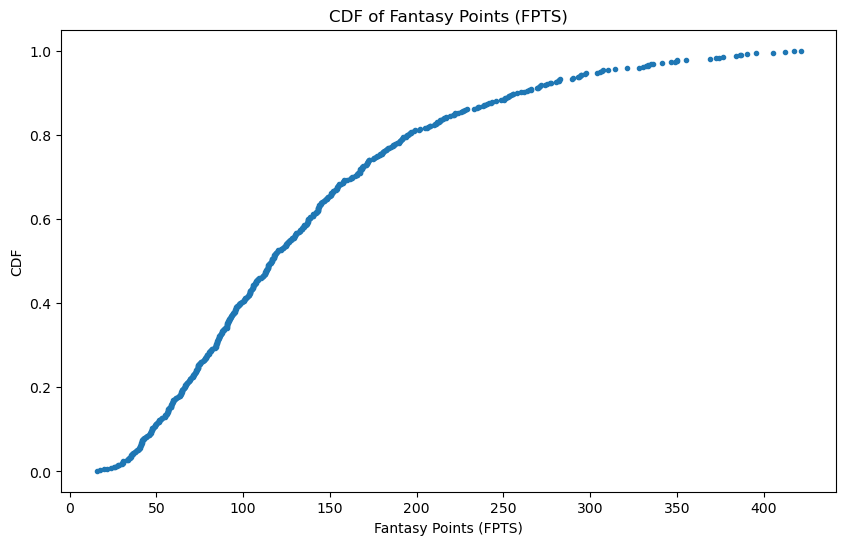

In [146]:
# create a CDF using FPTS

sorted_fpts = np.sort(merged_df['FPTS'])
cdf = np.arange(1, len(sorted_fpts)+1) / len(sorted_fpts)

# plot CDF

plt.figure(figsize=(10, 6))
plt.plot(sorted_fpts, cdf, marker='.', linestyle='none')
plt.title('CDF of Fantasy Points (FPTS)')
plt.xlabel('Fantasy Points (FPTS)')
plt.ylabel('CDF')
plt.show()

###### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen

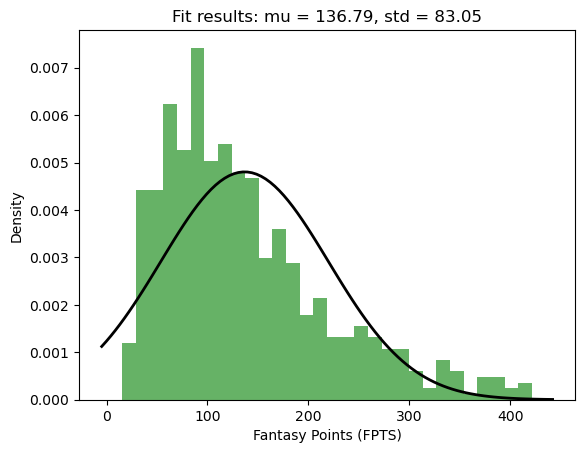

In [149]:
# plot an analytical distribution for FPTS 
mu, std = norm.fit(merged_df['FPTS'])  # fit a normal distribution to the FPTS data

# plot the histogram
plt.hist(merged_df['FPTS'], bins=30, density=True, alpha=0.6, color='g')

# plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Fantasy Points (FPTS)')
plt.ylabel('Density')
plt.show()

###### Create two scatter plots comparing two variables and provide your analysis on correlation and causation

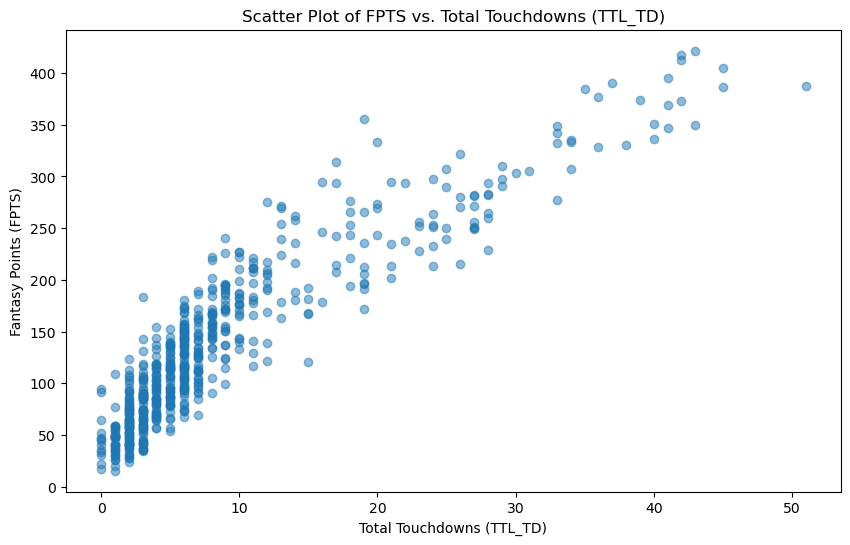

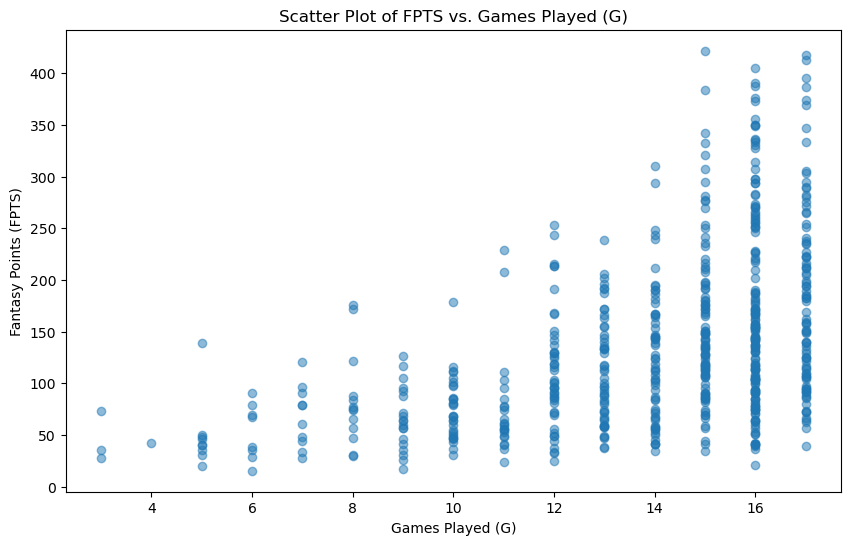

In [151]:
# scatter plot 1: FPTS vs TTL_TD

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['TTL_TD'], merged_df['FPTS'], alpha=0.5)
plt.title('Scatter Plot of FPTS vs. Total Touchdowns (TTL_TD)')
plt.xlabel('Total Touchdowns (TTL_TD)')
plt.ylabel('Fantasy Points (FPTS)')
plt.show()

# scatter plot 2: FPTS vs G

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['G'], merged_df['FPTS'], alpha=0.5)
plt.title('Scatter Plot of FPTS vs. Games Played (G)')
plt.xlabel('Games Played (G)')
plt.ylabel('Fantasy Points (FPTS)')
plt.show()

Scatter Plot Analysis

Scatter Plot 1: FPTS vs TTL_TD (Total Touchdowns)

There appears to be a positive relationship between Total Touchdowns and Fantasy Points. As the number of touchdowns increases, the fantasy points also tend to increase. This suggests a strong correlation, where players scoring more touchdowns are likely to accumulate more fantasy points, highlighting touchdowns as a critical factor in fantasy football performance.
The distribution also suggests a potential non-linear relationship, as the increase in fantasy points seems to accelerate with touchdowns, indicating that players with high touchdown counts are exceptionally valuable in fantasy football.

Scatter Plot 2: FPTS vs G (Games Played)

The relationship between Games Played and Fantasy Points is less clear than with touchdowns. While there is a general trend that more games played can lead to higher fantasy points, the correlation appears weaker. This indicates that simply playing more games is not as direct a predictor of fantasy success as scoring touchdowns.
There are instances where players have played many games but have not accumulated high fantasy points, suggesting that factors other than mere participation, such as performance metrics like touchdowns, play a significant role in determining fantasy points.
Conclusions from Scatter Plots
TTL_TD vs FPTS: A strong positive correlation, suggesting touchdowns are a key performance indicator for fantasy football.
G vs FPTS: A weaker correlation, indicating that while playing more games provides more opportunities for points, performance in those games is crucial.
These analyses support the hypothesis that drafting players who are likely to score touchdowns (often quarterbacks or other key offensive positions) could significantly impact fantasy football team performance. It also underscores the importance of considering performance metrics over merely participation metrics like games played.

###### Hypothesis Testing

In [163]:
# using permutation testing


# filter for quarterbacks (QBs) only
qbs_data = merged_df[merged_df['Posit'] == 'QB']

# cutoff for early draft picks (first 25% of the Overall picks)
cutoff = qbs_data['Overall'].quantile(0.25)

# early and late based on their Overall draft position

early_qbs_fpts = qbs_data[qbs_data['Overall'] <= cutoff]['FPTS'].dropna()
late_qbs_fpts = qbs_data[qbs_data['Overall'] > cutoff]['FPTS'].dropna()

# define the permutation test function

def permutation_test(data1, data2, n_permutations=10000):
    observed_diff = np.mean(data1) - np.mean(data2)   # calc the observed difference in means
    combined_data = np.concatenate([data1, data2])    # combine all data points
    perm_diffs = []                                   # differences in means from permutations
    
    for _ in range(n_permutations):
        np.random.shuffle(combined_data)
        perm_data1 = combined_data[:len(data1)]
        perm_data2 = combined_data[len(data1):]
        perm_diff = np.mean(perm_data1) - np.mean(perm_data2)
        perm_diffs.append(perm_diff)
  
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff)) # calc p-value as the proportion of permuted difference
    
    return observed_diff, p_value, perm_diffs

# perform the permutation test

obs_diff, p_value, perm_diffs = permutation_test(early_qbs_fpts, late_qbs_fpts)

obs_diff, p_value


(73.26527777777784, 0.0002)

The permutation test yields an observed difference in mean fantasy points of approximately 73.27 between quarterbacks drafted early and those drafted later, with a p-value of 0.0002.

Given the p-value is significantly below the common threshold of 0.05, we reject the null hypothesis. This indicates a statistically significant difference in the mean fantasy points between quarterbacks drafted early and those drafted later in fantasy football drafts.

Thus, this analysis supports the hypothesis that drafting a quarterback early in a fantasy football draft can significantly contribute to improved team performance, compared to drafting quarterbacks later or prioritizing other positions earlier. This finding emphasizes the strategic advantage of selecting high-performing quarterbacks early in the draft process.

###### Conduct a regression analysis

In [166]:
# conduct a regression analysis

# independent var, explanatory var

X = merged_df[['FPTS.G', 'TTL_TD', 'Overall', 'G']]
X = sm.add_constant(X)

# dependent variable
y = merged_df['FPTS']

# multiple linear regression model
model = sm.OLS(y, X, missing='drop').fit() 

# summary of the regression model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FPTS   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     5730.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:05:49   Log-Likelihood:                -2476.4
No. Observations:                 617   AIC:                             4963.
Df Residuals:                     612   BIC:                             4985.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -90.1466      4.189    -21.522      0.000     -98.372     -81.921
FPTS.G        10.0465      0.274     36.629      0.000       9.508      10.585
TTL_TD         2.5164      0.153     16.496      0.000       2.217       2.816
Overall       -0.0929      0.013     -7.212      0.000      -0.118      -0.068
G              8.3383      0.203     41.119      0.000       7.940       8.737
==============================================================================
Omnibus:                      393.917   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11298.647
Skew:                          -2.336   Prob(JB):                         0.00
Kurtosis:                      23.437   Cond. No.                         799.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The analysis highlights the impact of performance (FPTS.G, TTL_TD) and availability (G) on a player's total fantasy points. While draft position does have a statistically significant effect, its impact is relatively small compared to the other factors. 

This paper summarizes the statistical analysis conducted on a dataset comprising various metrics related to NFL players performance.  The purpose was to understand how different factors contribute to fantasy football team performance. The primary question guiding this analysis was whether drafting a quarterback early in a fantasy football draft significantly contributes to improved fantasy football team performance compared to drafting quarterbacks later or selecting other positions earlier.

Outcome of EDA:
The exploratory data analysis (EDA) began with a selection of relevant variables: Fantasy Points (FPTS), Fantasy Points Per Game (FPTS.G), Total Touchdowns (TTL_TD), Overall Draft Position (Overall), Games Played (G), and Player Position (Posit). Histograms for these variables highlighted their distributions, with notable outliers in FPTS and TTL_TD indicating exceptional performances. Comparing scenarios using Probability Mass Functions (PMFs) for different player positions revealed distinct performance patterns, particularly between quarterbacks and other positions. The Cumulative Distribution Function (CDF) of FPTS showed a steep curve, indicating a significant concentration of players with lower fantasy points and a long tail for high performers. A hypothesis test using the permutation method found a statistically significant difference in fantasy points between quarterbacks drafted early versus those drafted later, supporting the hypothesis that early-drafted quarterbacks tend to contribute more significantly to team performance.

Missed Analysis and Potential Variables:
One limitation of the analysis was the incorporation of player injurys, or the strength of their team's schedule, which could significantly affect their fantasy output. Additionally, examining correlations between variables more closely could have provided deeper insights or interaction effects not captured by the initial analysis.

Assumptions and Challenges:
The analysis assumed that the selected variables were independent predictors of fantasy performance, which might not account for the complex dynamics of NFL games and team strategies. For example, the impact of a team's offensive line quality on a quarterbacks performance was not considered, which could skew the analysis' conclusions.

The main challenge faced was determining the direct impact of specific variables on fantasy performance due to the multifaceted nature of football. Distinguishing between correlation and causation in the context of fantasy points was complex, requiring careful interpretation of statistical models and tests.

Conclusion:
The analysis provides valuable insights into factors contributing to fantasy football performance, with significant findings supporting the strategy of drafting quarterbacks early. However, the limitations and challenges encountered highlight the need for a more robust approach. This could include additional variables which would test the interdependencies within football performance metrics. Future analyses could also benefit from incorporating more comprehensive data, including team-level metrics, player injury reports, and more advanced statistical techniques to untangle the intricate web of factors that influence fantasy football success.